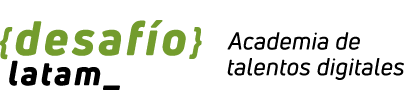

# Desafío - Introducción al Machine Learning

**Nombre:** Ignacio Robles  
**Grupo:** G-115 Ciencia de Datos

## Parte I: Preguntas Conceptuales

### 1. ¿Cuál es la diferencia entre el aprendizaje supervisado y el aprendizaje no supervisado?

El aprendizaje supervisado es aquel en el que se presentan etiquetas(labels), se entrenan los modelos con los datos usando divisiones entre valores de entrenamiento y se reservar un set para evaluación o prueba (test set), con el que medimos qué tan bien entrenado está nuestro modelo. En el aprendizaje no supervisado solo se entregan parámetros de entrada y el modelo es el encargado de buscar patrones y estructuras ocultas en los datos, sin tener una etiqueta de guía. 

### 2. En la industria de la salud...
¿Qué tipo de aprendizaje utilizarías para construir un modelo predictivo?

Usaría aprendizaje supervisado y no supervisado. Ambos son buenos y efectivos, dependiendo del problema. Se usa el no supervisado para detección de imágenes, como escaneo de tumores. Se usa el supervisado para generar modelos de clasificación, como posibilidades de afectaciones cardíacas con un modelo de selección y probabilidad de sufrir enfermedades vía modelo de regresión


### 3. ¿Por qué es necesario dividir el set de datos en dos sets al realizar modelamiento supervisado?
¿Cuáles son y cuál es la función de cada uno?

Es necesario para poder evaluar el desempeño de nuestro modelo y revisar si no caemos en overfitting o underfitting. También es importante no filtrar datos entre estos sets, lo que se denomina data leackage. La función del test de entrenamiento es hacer que el modelo aprenda los patrones que corresponden a cada etiqueta o variable booleana (selección) y el test de prueba se usa para medir los resultados y ver que tan efectivo es nuestro modelo. 

### 4. ¿Cuál es la principal diferencia en el modelamiento de la regresión lineal desde un enfoque estadístico y uno de machine learning?

En el enfoque estadístico nos concentramos en evaluar las relaciones entre las variables, si hay o no multicolinealidad, revisar los supuestos y realizar tests para verificar con rigurosidad que se cumplan los supuestos teóricos. En el enfoque de Machine Learning el enfoque es más pragmático, nos concentramos en el feature engineering (transformar los datos para su procesamiento), evaluamos más el resultado y no somos tan estrictos. Si el modelo predice bien, a veces se toleran fallas que no están permitidas desde un punto de vista estadístico. 

### 5. Escoge una industria de tu interés y menciona aplicaciones de:
- Aprendizaje Supervisado (Clasificación)
- Aprendizaje Supervisado (Regresión)
- Aprendizaje No Supervisado (Clustering)
- Aprendizaje No Supervisado (Reducción de dimensionalidad)

#### **Marketing**

1. Aprendizaje Supervisado (Clasificación): Probabilidad con regresión lineal de que un usuario reaccione positivamente y decida comprar, vs no comprar. 
2. Aprendizaje Supervisado (Regresión): Predecir el comportamiento de un sitio web en el tiempo, basado en clicks e impresiones. 
3. Aprendizaje No Supervisado (Clustering): Encontrar patrones de consumidores en un dataset, ejemplo "clientes fieles, potenciales clientes, gente no interesada". 
4. Aprendizaje No Supervisado (Reducción de dimensionalidad): Tengo un dataset con muchas variables, pero hay multicolinealidad y gran riesgo de que el modelo no prediga adecuadamente. Realizo un PCA para reducir la dimensionaldiad en las variables que tienen alta correlación habiendo realizado previamente un mapa de calor para medir correlación. 

## Parte II

En este ejemplo, utilizaremos Python y la biblioteca Scikit-learn para construir y entrenar nuestro modelo de regresión lineal. A continuación, se presenta un paso a paso para llevar a cabo este desafío:

6. Carga los datos de la base `data_housing.csv` e importa las librerías necesarias para cargar los datos en un DataFrame, manipularlos, hacer cálculos, analizarlos y construir modelos de regresión lineal. Utiliza Pandas, NumPy y Scikit-learn.

In [1]:
# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de machine learning
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Librerías para leer DataFrames y Data Arranges
import pandas as pd, numpy as np

In [2]:
# Fijamos formatos para mejorar la visualización de dataframes en nuestro cuaderno
pd.set_option("display.max_columns", None)      # muestra todas las columnas
pd.set_option("display.max_rows", None)         # todas las filas
pd.set_option("display.width", None)            # clave: usa el ancho real del notebook
pd.set_option("display.max_colwidth", None)     # no corta strings largos
pd.set_option("display.expand_frame_repr", False)

In [3]:
# Usamos el método read_excel de Pandas para importar nuestros datos en formato DataFrame
df = pd.read_excel('data-housing.xlsx')

# Verificamos que todo queda en orden con un print de las primeras 5 filas
print(df.head())

      price  area  bedrooms  bathrooms  stories guestroom hotwaterheating airconditioning  parking
0  13300000  7420         4          2        3        no              no             yes        2
1  12250000  8960         4          4        4        no              no             yes        3
2  12250000  9960         3          2        2        no              no              no        2
3  12215000  7500         4          2        2        no              no             yes        3
4  11410000  7420         4          1        2       yes              no             yes        2


7. Genera un informe de calidad de datos de la base. Analiza la existencia de datos atípicos, extraños o nulos. Además, analiza las posibles correlaciones entre las variables.

--------
#### Evaluación general

--------

In [4]:
print("Esta es la forma del dataframe:")
print(df.shape)
print("\nEstas son las primeras filas del dataframe:")
print(df.head())
print("\nEsta es la info de los datos del dataframe que nos muestra cantidad de datos nulos y los distintos tipos de datos:")
print(df.info())

Esta es la forma del dataframe:
(545, 9)

Estas son las primeras filas del dataframe:
      price  area  bedrooms  bathrooms  stories guestroom hotwaterheating airconditioning  parking
0  13300000  7420         4          2        3        no              no             yes        2
1  12250000  8960         4          4        4        no              no             yes        3
2  12250000  9960         3          2        2        no              no              no        2
3  12215000  7500         4          2        2        no              no             yes        3
4  11410000  7420         4          1        2       yes              no             yes        2

Esta es la info de los datos del dataframe que nos muestra cantidad de datos nulos y los distintos tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price

------
#### Datos atípicos
------

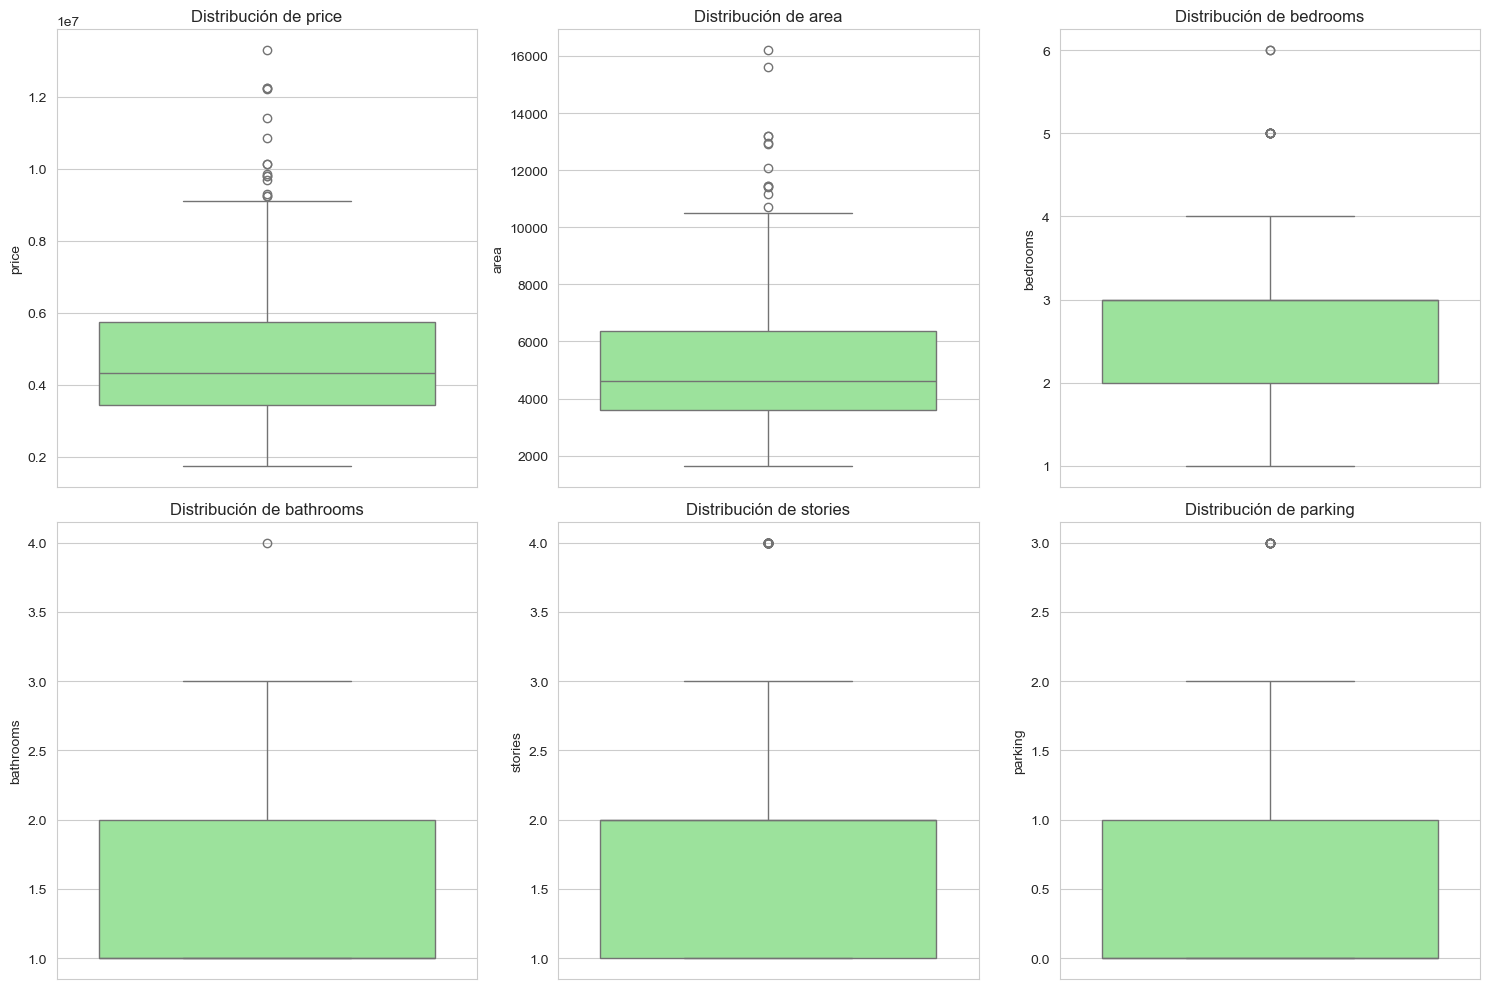

In [24]:
# Primero creamos una variable que contenga los nombres de las columnas
cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

# Ahora creamos un boxplot para cada columna del DataFrame, usando seaborn y matplotlib.
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes.flatten()[i], color="lightgreen")
    axes.flatten()[i].set_title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

Vemos varios **outliers**, sobretodo en `price` y `area`, por lo que vamos a aplicar una visualización extendiendo el rango del bigote y poder ver si estos saldrían eliminados en un proceso usando el IQR. 
Esto extiende los bigotes a 3 veces el IQR para ver solo los outliers **"extremos"**.

<Axes: ylabel='price'>

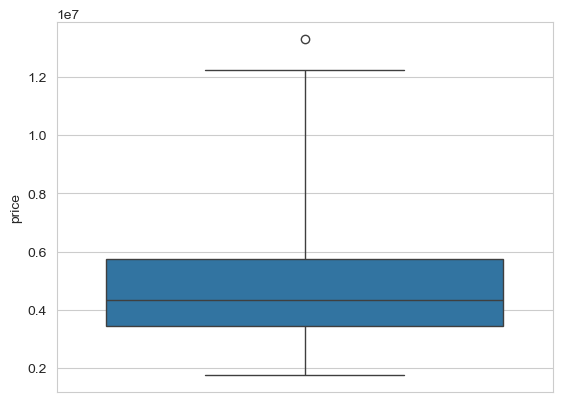

In [25]:
# Esto extiende los bigotes a 3 veces el IQR para ver solo los outliers "extremos"
sns.boxplot(y=df['price'], whis=3)

In [26]:
# 1. Identificamos el umbral (basado en el gráfico de whis=3)
# Sabemos que la casa aislada está por encima de los 12.5 millones, no queremos que esto nos afecte el modelo, así que establecemos un umbral de corte en 12.5 millones.
umbral_corte = 12500000

# 2. Creamos el nuevo DataFrame filtrado
# "Mantén solo las filas donde el precio sea menor a 12.5M"
df_final = df[df['price'] <= umbral_corte].copy()

# 3. Verificamos cuántas filas eliminamos
eliminadas = len(df) - len(df_final)
print(f"Se ha eliminado {eliminadas} casa(s) del dataset.")
print(f"Nuevo tamaño del dataset: {len(df_final)} filas.")

Se ha eliminado 1 casa(s) del dataset.
Nuevo tamaño del dataset: 544 filas.


<Axes: ylabel='area'>

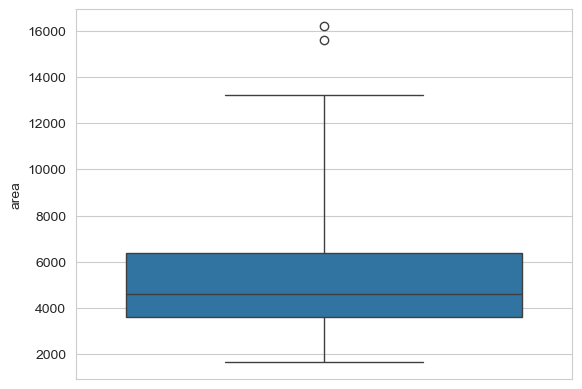

In [27]:
# Realizamos lo mismo para la variable 'area' para eliminar outliers extremos
sns.boxplot(y=df['area'], whis=3)

In [28]:
# 1. Identificamos el umbral (basado en el gráfico de whis=3)
# Sabemos que la casa aislada está por encima de los 12.5 millones
umbral_corte = 15500

# 2. Creamos el nuevo DataFrame filtrado
# "Mantén solo las filas donde el area sea menor o igual al umbral"
df_final = df[df['area'] <= umbral_corte].copy()

# 3. Verificamos cuántas filas eliminamos
eliminadas = len(df) - len(df_final)
print(f"Se ha eliminado {eliminadas} casa(s) del dataset.")
print(f"Nuevo tamaño del dataset: {len(df_final)} filas.")

Se ha eliminado 2 casa(s) del dataset.
Nuevo tamaño del dataset: 543 filas.


<Axes: ylabel='bedrooms'>

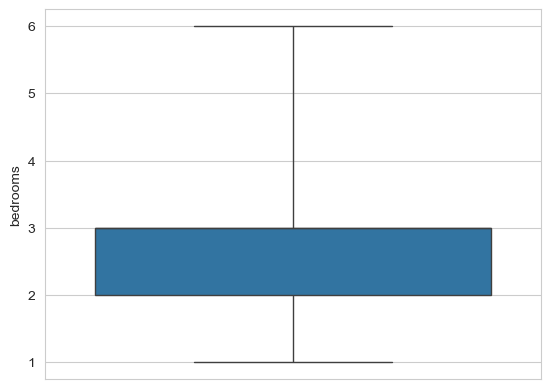

In [29]:
# Realizamos lo mismo para la variable 'bedrooms' para eliminar outliers extremos
sns.boxplot(y=df['bedrooms'], whis=3)

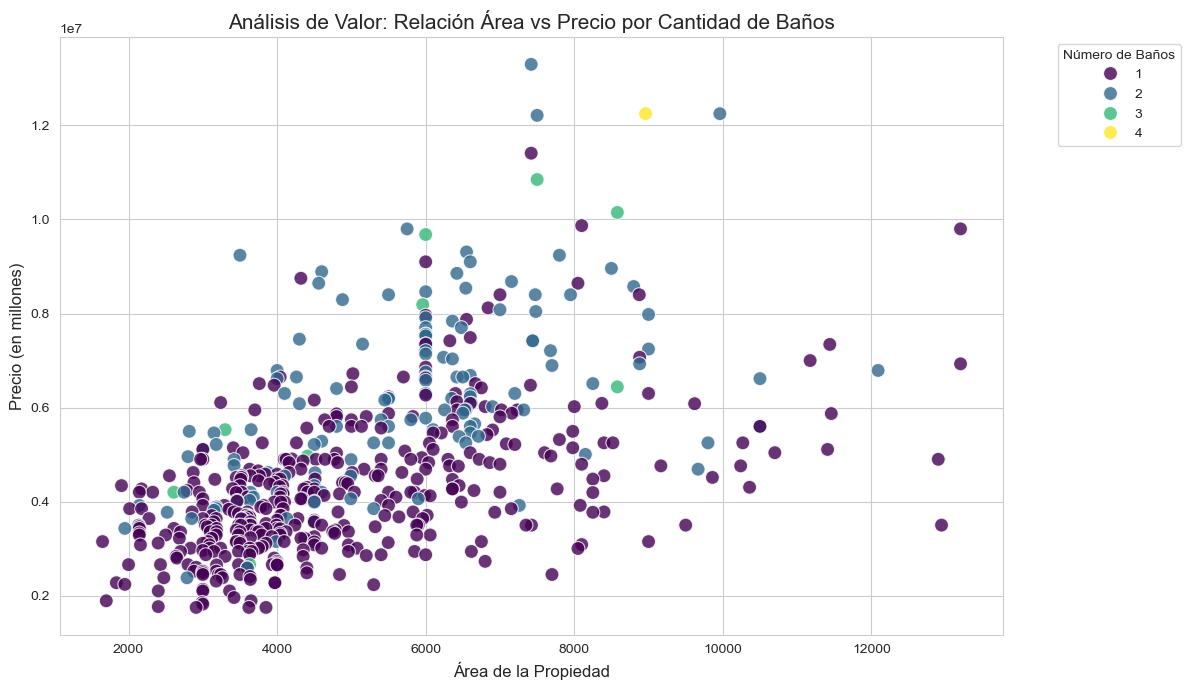

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Creamos el gráfico de dispersión
# 'hue' asigna un color según la cantidad de baños
# 'palette' usa una degradación de colores (puedes usar 'viridis' o 'coolwarm')
scatter = sns.scatterplot(data=df_final, 
                          x='area', 
                          y='price', 
                          hue='bathrooms', 
                          palette='viridis', 
                          s=100, 
                          alpha=0.8)

# Mejoramos la estética
plt.title('Análisis de Valor: Relación Área vs Precio por Cantidad de Baños', fontsize=15)
plt.xlabel('Área de la Propiedad', fontsize=12)
plt.ylabel('Precio (en millones)', fontsize=12)
plt.legend(title='Número de Baños', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Análisis de patrones relevantes (extensión de eliminación de outliers)

- **Efecto de los baños en el precio**  
  A igual tamaño de terreno, las propiedades con mayor número de baños presentan sistemáticamente precios más altos. Esto confirma que el número de baños es una variable explicativa clave del valor de la vivienda, con un impacto comparable al área del terreno.

- **Equipamiento versus tamaño**  
  Se observa que propiedades que no son las más grandes pueden alcanzar precios significativamente mayores cuando cuentan con más baños. Esto evidencia que el valor no depende únicamente de los metros cuadrados, sino también del nivel de equipamiento y confort de la vivienda.

- **Concentración del mercado medio**  
  La mayor densidad de observaciones se encuentra en rangos intermedios de área y precio, donde las propiedades muestran comportamientos más homogéneos y predecibles. Este segmento representa el núcleo del mercado inmobiliario analizado.

- **Impacto de la eliminación de outliers**  
  La exclusión de valores extremos permitió mejorar la escala del gráfico y revelar con mayor claridad la estructura interna de los datos, facilitando la identificación de patrones relevantes entre las variables.

--------
#### Variables booleanas

--------

### Codificación de variables categóricas

Para poder incorporar variables categóricas al modelo de regresión lineal, es necesario transformarlas a un formato numérico. En este caso, se aplica una codificación binaria (*encoding*), donde los valores `"yes"` y `"no"` se convierten en `1` y `0`, respectivamente.

El objetivo de esta transformación es preservar la información contenida en la variable original y evaluar si su inclusión contribuye a mejorar el desempeño del modelo, permitiendo que el algoritmo pueda interpretar correctamente su efecto sobre la variable objetivo.

In [31]:
# Creamos una comprehension list con las columnas que no son numéricas
str_cols = [col for col in df.columns if pd.api.types.is_string_dtype(df[col])]
# Imprimimos los valores únicos de cada columna categórica para asegurarnos que sean efectivamente booleanos y que no haya valores inesperados
for col in df_final[str_cols]:
    print(f"Valores únicos en la columna '{col}': {df_final[col].unique()}")

Valores únicos en la columna 'guestroom': ['no' 'yes']
Valores únicos en la columna 'hotwaterheating': ['no' 'yes']
Valores únicos en la columna 'airconditioning': ['yes' 'no']


In [32]:
# Convertimos 'Yes' a 1 y 'No' a 0
df_final['guestroom'] = df_final['guestroom'].map({'yes': 1, 'no': 0})
df_final['hotwaterheating'] = df_final['hotwaterheating'].map({'yes': 1, 'no': 0})
df_final['airconditioning'] = df_final['airconditioning'].map({'yes': 1, 'no': 0})

# Imprimimos nuestro DataFrame
print("\nResultado luego del encoding: ")
print(df_final.head())


Resultado luego del encoding: 
      price  area  bedrooms  bathrooms  stories  guestroom  hotwaterheating  airconditioning  parking
0  13300000  7420         4          2        3          0                0                1        2
1  12250000  8960         4          4        4          0                0                1        3
2  12250000  9960         3          2        2          0                0                0        2
3  12215000  7500         4          2        2          0                0                1        3
4  11410000  7420         4          1        2          1                0                1        2


-----
#### Correlación de Variables

-----

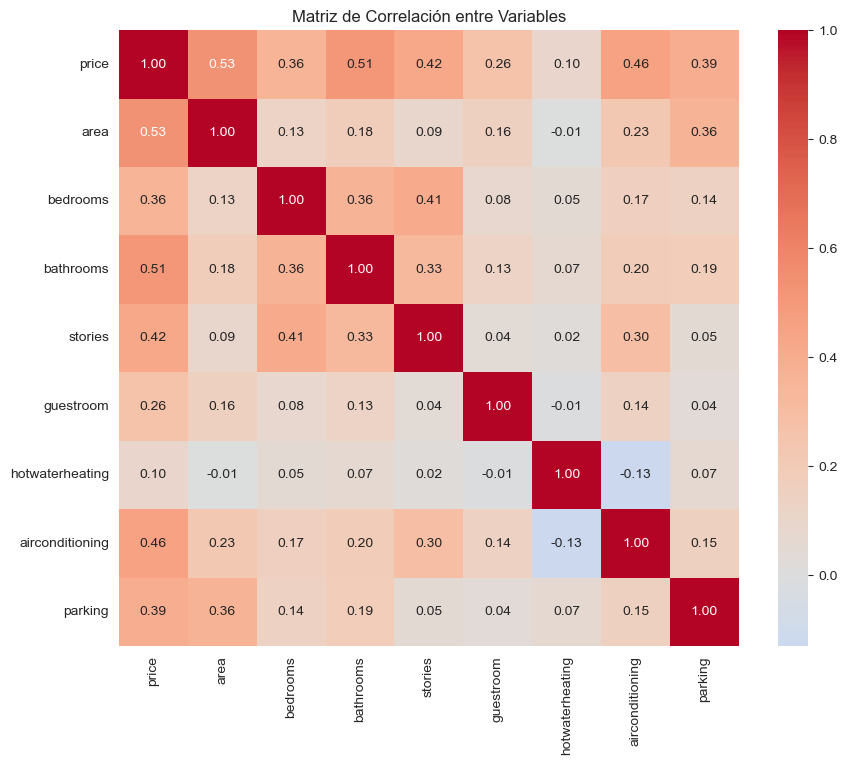

In [33]:
# Usamos la matríz de correlación para visualizar las relaciones entre variables numéricas
corr_matrix = df_final.select_dtypes(include=['number']).corr()

# 2. Configuramos el tamaño de la figura
plt.figure(figsize=(10, 8))

# 3. Creamos el heatmap
sns.heatmap(corr_matrix, 
            annot=True,      # Muestra los números dentro de los cuadros
            fmt=".2f",       # Formato de 2 decimales
            cmap='coolwarm', # Color: azul (negativo), rojo (positivo)
            center=0)        # El blanco será el 0 (sin correlación)

plt.title('Matriz de Correlación entre Variables')
plt.show()

### Análisis de Correlaciones: Variables Determinantes del Precio

#### 1. El nuevo peso pesado: *Air Conditioning* (0.46)

La correlación entre **`price`** y **`airconditioning`** alcanza **0.46**, posicionando esta variable como uno de los factores más influyentes en el valor de la propiedad.

- Es prácticamente tan relevante como el número de pisos (**`stories`**, 0.42).
- Supera incluso al número de habitaciones (**`bedrooms`**, 0.36).

**Interpretación:**  
En este mercado, el aire acondicionado no es un simple extra: es un atributo percibido como un **lujo** y su presencia impacta de forma directa en el precio final.

#### 2. Variables que “no mueven la aguja”

Algunas características presentan una relación débil con el precio, lo que sugiere un impacto limitado en la valoración de la propiedad.
- **`hotwaterheating` (0.10):**  
  La calefacción por agua caliente muestra una correlación muy baja. Esto indica que, para los compradores, no constituye un factor decisivo al momento de pagar más por una vivienda.
- **`guestroom` (0.26):**  
  Resulta llamativo que contar con una habitación de invitados tenga un efecto menor al esperado sobre el precio.
**Lectura general:**  
No todas las comodidades se traducen automáticamente en mayor valor percibido por el mercado.

#### 3. La “Tríada del Valor” 

Si el objetivo fuera maximizar el precio de venta de una vivienda, la matriz de correlación sugiere priorizar claramente los siguientes atributos:

1. **Área construida** — 0.53  
2. **Número de baños** — 0.51  
3. **Aire acondicionado** — 0.46  

Estos tres factores concentran las correlaciones más altas con el precio y conforman el **núcleo duro del valor inmobiliario** en este dataset.

-------
#### Conclusión

La inclusión de variables booleanas transformadas permitió descubrir relaciones clave que no eran evidentes en un análisis previo.  
El resultado es una visión más completa y accionable del mercado, útil tanto para modelado predictivo como para la toma de decisiones estratégicas en contextos inmobiliarios.

-------

8.Genera un modelo de regresión lineal. Para ello:

a. Importa el estimador de regresión lineal de Scikit-learn.  
b. Divide los datos (80% train y 20% test).  
c. Crea una instancia del modelo de regresión lineal.  
d. Ajusta el modelo utilizando los datos de entrenamiento.

In [15]:
# Como el importador ya fue iniciado generamos la división de X e y
prices_X, prices_y = df_final.loc[:, df_final.columns != 'price'], df_final['price']

# Visualizamos las primeras filas de X e y
print("Dagtaset de entrenamiento: ")
print(prices_X.head())
print("\nDataset de etiquetas: ")
print(prices_y.head())

Dagtaset de entrenamiento: 
   area  bedrooms  bathrooms  stories  guestroom  hotwaterheating  airconditioning  parking
0  7420         4          2        3          0                0                1        2
1  8960         4          4        4          0                0                1        3
2  9960         3          2        2          0                0                0        2
3  7500         4          2        2          0                0                1        3
4  7420         4          1        2          1                0                1        2

Dataset de etiquetas: 
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


In [16]:
# Usamos la clase train_test_split de sklearn para dividir nuestros datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(prices_X, prices_y, test_size= 0.3, random_state=42)

# Instanciamos nuestor objeto de regresión lineal
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print("Modelo entrenado con éxito.")

Modelo entrenado con éxito.


In [17]:
# Usamos el método predict con el dataset de pruea para generar predicciones
y_pred = regr.predict(X_test)

# Imprimimos los coeficientes del modelo
print('Coeficientes: \n', regr.coef_)

Coeficientes: 
 [2.77802600e+02 1.79062201e+05 9.11001030e+05 4.47825802e+05
 7.03614286e+05 8.22313693e+05 8.40083494e+05 3.54171140e+05]


### Análisis de coeficientes del modelo

Los coeficientes del modelo permiten interpretar el impacto marginal de cada variable sobre el precio de la vivienda. En general, se observa que la mayoría de las variables presentan coeficientes positivos, lo que indica una relación directa con la variable objetivo.

Además, las diferencias en el orden de magnitud sugieren que ciertas características tienen un efecto más relevante en la predicción del precio que otras. Esta información resulta útil para comprender qué atributos aportan mayor valor al modelo y para validar que los resultados sean coherentes con el comportamiento esperado del mercado inmobiliario.

9.Evalúa el modelo. Para ello:

a. Utiliza los datos de entrenamiento y calcula métricas de evaluación, como el error cuadrado medio (MSE) o el coeficiente de determinación (R²). Grafica los coeficientes.  

b. Utiliza los datos de prueba para realizar predicciones con el modelo entrenado, y evalúa el rendimiento del modelo comparando las predicciones con los valores reales.

In [18]:
# a. Error cuadrático medio (MSE)
print('Error cuadrado medio: %.2f' % mean_squared_error(y_test, y_pred))

# Cálculo del R2
r2 = r2_score(y_test, y_pred)
print('\nCoeficiente de determinación (R2): %.2f' % r2)

Error cuadrado medio: 1667426354546.93

Coeficiente de determinación (R2): 0.60


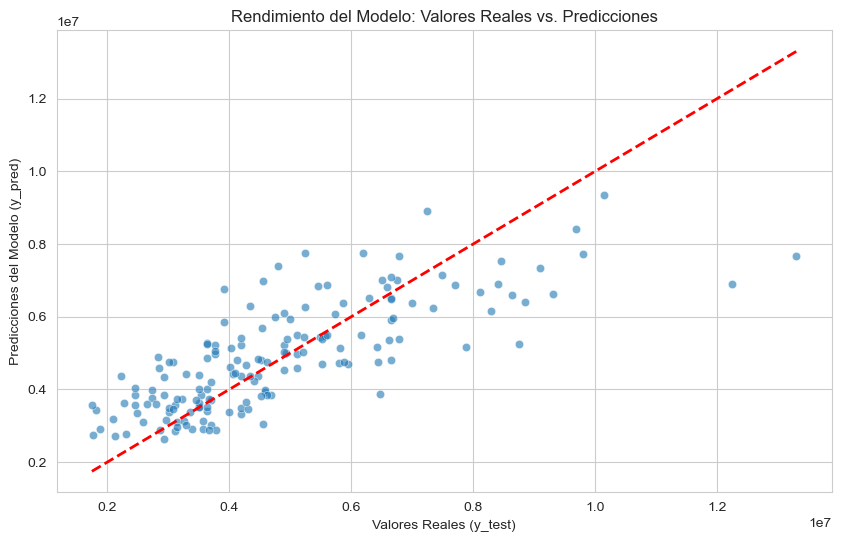

In [19]:
plt.figure(figsize=(10, 6))

# Graficamos Real vs Predicho
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Dibujamos la línea de "Predicción Perfecta"
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')

plt.title('Rendimiento del Modelo: Valores Reales vs. Predicciones')
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Predicciones del Modelo (y_pred)')
plt.show()

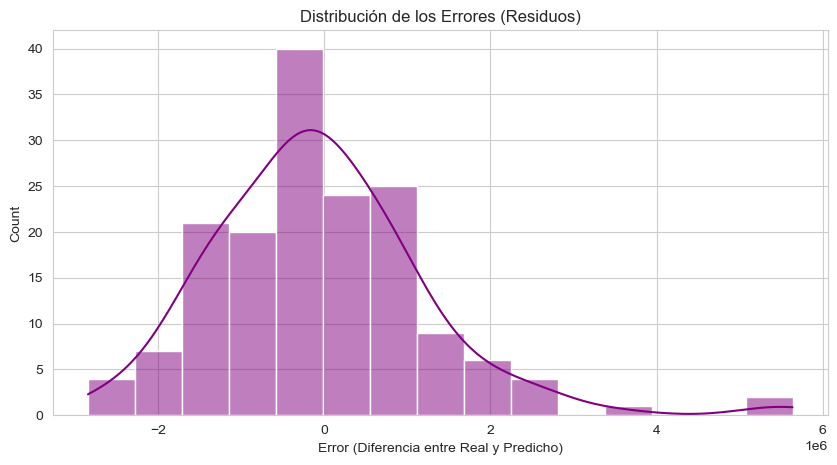

In [20]:
residuos = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.histplot(residuos, kde=True, color='purple')
plt.title('Distribución de los Errores (Residuos)')
plt.xlabel('Error (Diferencia entre Real y Predicho)')
plt.show()

### Análisis de la distribución de errores (residuos)

La distribución de los residuos se concentra mayoritariamente en torno a cero, lo que indica que el modelo no presenta un sesgo sistemático importante en sus predicciones. La forma aproximadamente simétrica sugiere un ajuste razonable para la mayoría de las observaciones.

No obstante, se observa una ligera asimetría hacia valores positivos, lo que indica que en algunos casos el modelo tiende a subestimar el precio real de ciertas propiedades, especialmente en rangos más altos.

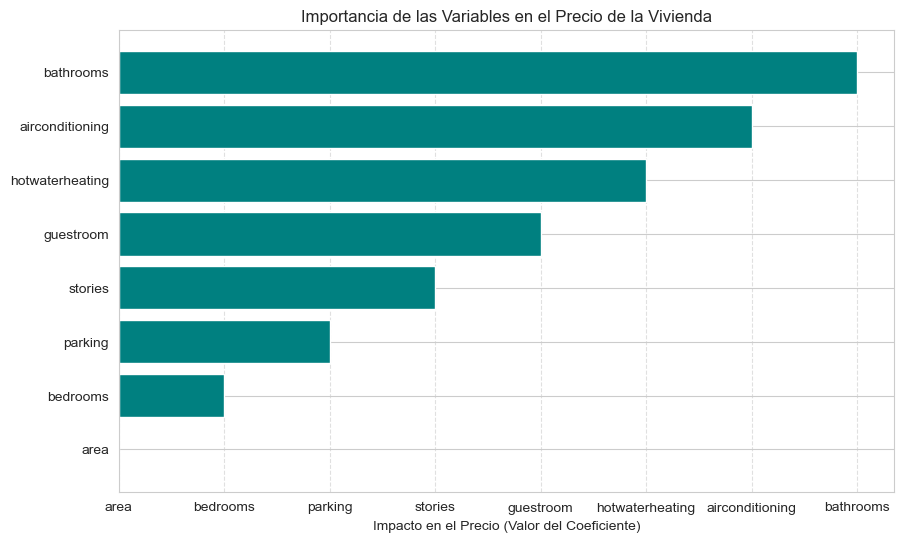

In [ ]:
# Creamos un DataFrame con los coeficientes para que sea fácil de graficar
# prices_X.columns debe ser la lista de variables que usaste en el fit
importancia_df = pd.DataFrame({
    'Variable': prices_X.columns,
    'Coeficiente': regr.coef_
})

# Ordenamos por valor absoluto para ver las más importantes primero
importancia_df = importancia_df.sort_values(by='Coeficiente', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Variable'], importancia_df['Variable'], color='teal')
plt.title('Importancia de las Variables en el Precio de la Vivienda')
plt.xlabel('Impacto en el Precio (Valor del Coeficiente)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### Importancia de las variables en el precio de la vivienda

El análisis de los coeficientes del modelo muestra que las variables asociadas al equipamiento y confort de la vivienda tienen un impacto más relevante en el precio que el tamaño físico por sí solo. En particular, el número de baños y la presencia de aire acondicionado destacan como los factores con mayor influencia en la predicción.

Por otro lado, variables como el número de dormitorios y el área presentan un efecto comparativamente menor, lo que sugiere que el valor de la vivienda está fuertemente determinado por sus características funcionales más que únicamente por su superficie.

-----

## Conclusiones y Análisis de Resultados

------

### 1. Proceso de Limpieza y Análisis Exploratorio (EDA)
Para garantizar la fiabilidad del modelo, se realizó un análisis exhaustivo de la distribución de los datos:

* **Boxplots (Diagramas de Caja):** Se utilizaron para identificar valores atípicos (outliers). Aplicamos un criterio de "limpieza quirúrgica" usando un multiplicador de $3 \times IQR$ para conservar la esencia del mercado pero eliminar ruidos extremos, como propiedades con áreas superiores a 15,500 o precios sobre los 12.5 millones.
* **Mapa de Calor (Heatmap):** Fundamental para entender la correlación de Pearson. Este gráfico nos permitió identificar que el **Área**, el **Número de Baños** y el **Aire Acondicionado** son los tres pilares que más impactan en el valor de la propiedad.
* **Scatter Plot (Dispersión):** Visualizamos la relación Área vs. Precio segmentada por colores según la cantidad de baños. Esto confirmó que, a igual metraje, el equipamiento de la casa (baños) actúa como un multiplicador del precio.

### 2. Rendimiento del Modelo de Regresión Lineal
Tras entrenar el modelo con una división de datos de 70% entrenamiento y 30% prueba, obtuvimos los siguientes resultados:

| Métrica | Valor | Interpretación |
| :--- | :--- | :--- |
| **R² (Coeficiente de Determinación)** | **0.60** | El modelo explica satisfactoriamente el 60% de la varianza del precio. |
| **MSE (Error Cuadrático Medio)** | **1.66e+12** | Refleja la magnitud del error al cuadrado en unidades monetarias. |
| **RMSE (Raíz del Error)** | **~1.29M** | En promedio, las predicciones se desvían 1.29 millones del valor real. |

### 3. Validación de Predicciones
* **Gráfico de Valores Reales vs. Predicciones:** La alineación de los puntos respecto a la diagonal de referencia indica que el modelo es altamente eficaz en el rango de precios estándar (2M - 7M). Se observa una ligera subestimación en el segmento de súper lujo, lo cual es común en modelos lineales simples.
* **Distribución de Residuos:** El histograma de errores muestra una distribución normal centrada en cero. Esto valida estadísticamente que el modelo no tiene sesgos sistemáticos y que los errores son aleatorios, cumpliendo con los supuestos de la regresión lineal.

### Conclusión Final
El modelo es una herramienta robusta para realizar estimaciones rápidas de mercado. Los factores críticos para maximizar el valor de una propiedad en este dataset son la **optimización del área construida** y la **inversión en infraestructura de climatización y servicios (baños)**.

---

### Agradecimientos

Gracias por la oportunidad de desarrollar este desafío, que permitió reforzar conceptos fundamentales de Machine Learning y su aplicación práctica.